<a href="../PearlNoiseProject.ipynb">Back To Main</a>

<a id="top"></a>

## `Perlin Noise 2D model Exploration`

Now that we've explained how smoothstep functions affect 1D Pearl Noise, we'll show the impact on 2D Pearl Noise and we will implement a functionality.

### Required Libraries

First, let's import the necessary libraries:

In [1]:
import numpy as np
import matplotlib.pyplot as plt



## Generating Perlin Noise

To generate Perlin noise, we need to define a grid of "control points" that represent the corners of a lattice. Each control point has a pseudo-random gradient vector that points in a random direction in n-dimensional space, where n is the number of dimensions of the lattice. For example, a 2D lattice has a grid of control points with 2D gradient vectors, while a 3D lattice has a grid of control points with 3D gradient vectors.

To generate a Perlin noise value at a given position in the lattice, we need to interpolate between the surrounding control points. The interpolation function should be smooth and continuous, such as a cubic or quintic polynomial. The interpolation weight should be determined by the distance between the position and the control points, as well as the gradient vectors at the control points.

The Perlin noise generation code runs through the following main steps:

1. Initialization of a grid (gradient vectors).
2. Computing the dot product between the gradient vectors and distance vectors.
3. Interpolation of the computed values using the smoothstep function.
4. Normalization of the noise to the range [0, 1].

**Here are the mathematical explanation for each step:**

1. The grid is initialized with random gradient vectors $g_{ij} = (g_{ij_x}, g_{ij_y})$ for each grid point $(i, j)$, where $g_{ij_x}$ and $g_{ij_y}$ are random values between -1 and 1.

2. The dot product between gradient vectors and distance vectors is calculated as follows:

   $$dot_{00} = g_{00} \cdot (dx_0, dy_0)$$
   $$dot_{10} = g_{10} \cdot (dx_1, dy_0)$$
   $$dot_{01} = g_{01} \cdot (dx_0, dy_1)$$
   $$dot_{11} = g_{11} \cdot (dx_1, dy_1)$$

3. Interpolation is done using the smoothstep function and linear interpolation (lerp) as follows:

   $$t_x = smoothstep(dx_0) = dx_0^2(3 - 2dx_0)$$
   $$t_y = smoothstep(dy_0) = dy_0^2(3 - 2dy_0)$$

   $$lerp_{x0} = lerp(dot_{00}, dot_{10}, t_x) = dot_{00} + t_x(dot_{10} - dot_{00})$$
   $$lerp_{x1} = lerp(dot_{01}, dot_{11}, t_x) = dot_{01} + t_x(dot_{11} - dot_{01})$$

   $$noise = lerp(lerp_{x0}, lerp_{x1}, t_y) = lerp_{x0} + t_y(lerp_{x1} - lerp_{x0})$$

4. Finally, the noise is normalized to the range [0, 1]:

   $$normalized\_noise = \frac{noise + 1}{2}$$

Fractal Perlin noise is generated by summing multiple layers (octaves) of Perlin noise with different frequencies and amplitudes, which are controlled by the persistence parameter. The noise at each layer is calculated as:

$$noise\_layer = amplitude \times perlin\_noise(width, height, frequency)$$

The final fractal Perlin noise is the sum of all layers:

$$fractal\_perlin\_noise = \sum_{i=1}^{octaves} noise\_layer_i$$

The fractal Perlin noise is then normalized to the range [0, 1]:

$$normalized\_fractal\_perlin\_noise = \frac{fractal\_perlin\_noise - min(fractal\_perlin\_noise)}{max(fractal\_perlin\_noise) - min(fractal\_perlin\_noise)}$$

We will begin by creating a function for generating 2D Perlin Noise with the help of the interpolation function. The process of generating 2D Perlin Noise involves several steps, including creating a grid of gradient vectors, computing distance vectors, performing dot products, and interpolating the values using a blending function. The blending function, or interpolation function, ensures smooth transitions between the random gradient values, resulting in a continuous and visually appealing noise pattern.


In [2]:
def lerp(a, b, t):
    return a + t * (b - a)

def smoothstep(t):
    return t * t * (3 - 2 * t)

def perlin_noise(width, height, resolution, seed=None):
    if seed:
        np.random.seed(seed)
    
    grid_shape = (width // resolution + 1, height // resolution + 1, 2) 
    grid = np.random.uniform(-1, 1, size=grid_shape) 
    
    grid_norms = np.linalg.norm(grid, axis=-1, keepdims=True)
    grid /= grid_norms
    
    x_indices, y_indices = np.meshgrid(range(width), range(height), indexing='ij')
    
    x_coords = x_indices / resolution
    y_coords = y_indices / resolution
    
    x0, y0 = np.floor(x_coords).astype(int), np.floor(y_coords).astype(int)
    
    x1, y1 = (x0 + 1) % grid_shape[0], (y0 + 1) % grid_shape[1]
    dx0, dy0 = x_coords - x0, y_coords - y0
    dx1, dy1 = dx0 - 1, dy0 - 1
    
    dot00 = grid[x0, y0] * np.stack([dx0, dy0], axis=-1)
    
    dot10 = grid[x1, y0] * np.stack([dx1, dy0], axis=-1)
    dot01 = grid[x0, y1] * np.stack([dx0, dy1], axis=-1)
    dot11 = grid[x1, y1] * np.stack([dx1, dy1], axis=-1)
    
    dot00_sum = np.sum(dot00, axis=-1)
    dot10_sum = np.sum(dot10, axis=-1)
    dot01_sum = np.sum(dot01, axis=-1)
    dot11_sum = np.sum(dot11, axis=-1)
    
    tx = smoothstep(dx0)
    ty = smoothstep(dy0)

    noise = lerp(
        lerp(dot00_sum, dot10_sum, tx),
        lerp(dot01_sum, dot11_sum, tx),
        ty
    )

    noise = (noise + 1) / 2

    return noise


The code above defines a function for generating 2D Perlin Noise. The function takes `width`, `height`, `resolution`, and an optional `seed` parameter as inputs and returns a 2D Perlin Noise array of the specified dimensions. The code also defines two helper functions, `lerp` and `smoothstep`, which are used for linear interpolation and smoothing, respectively. Here is an introduction to the code:

1. **Linear Interpolation (lerp)**: The `lerp` function is a linear interpolation function that takes two values `a` and `b`, and an interpolation parameter `t`. It returns a value between `a` and `b` based on `t`, with `a` when `t=0` and `b` when `t=1`. The function uses the formula `a + t * (b - a)` to perform the interpolation.

2. **Smoothstep**: The `smoothstep` function is a smoothing function that takes an input parameter `t` and returns a smoothly interpolated value between 0 and 1. It uses the polynomial function `t * t * (3 - 2 * t)` to achieve smooth transitions without sharp edges.

3. **Perlin Noise Generation (perlin_noise)**: The `perlin_noise` function generates 2D Perlin Noise based on the provided `width`, `height`, `resolution`, and optional `seed`. The function initializes the random number generator, creates a grid of gradient vectors, computes distance vectors, performs dot products, interpolates the values using the `lerp` and `smoothstep` functions, and finally normalizes the noise values to the range [0, 1].

By combining these functions, the code generates smooth, continuous 2D Perlin Noise patterns.

Let's assume the size of our grid is $n \times m$, and the resolution is $r$. The gradients at each point in the grid are $G = (g_{x}, g_{y})$.

If the point we want to evaluate is $P = (x, y)$, the distance vectors from $P$ to the four surrounding points on the grid are given by $\mathbf{d}_{00} = (dx0, dy0)$, $\mathbf{d}_{10} = (dx1, dy0)$, $\mathbf{d}_{01} = (dx0, dy1)$, and $\mathbf{d}_{11} = (dx1, dy1)$.

We first calculate the dot product of these distance vectors and the gradients at the corresponding grid points, as follows:

$$
\begin{align*}
dot_{00} &= \mathbf{d}_{00} \cdot \mathbf{g}_{00} = dx0 * g_{x0} + dy0 * g_{y0} \\
dot_{10} &= \mathbf{d}_{10} \cdot \mathbf{g}_{10} = dx1 * g_{x1} + dy0 * g_{y1} \\
dot_{01} &= \mathbf{d}_{01} \cdot \mathbf{g}_{01} = dx0 * g_{x2} + dy1 * g_{y2} \\
dot_{11} &= \mathbf{d}_{11} \cdot \mathbf{g}_{11} = dx1 * g_{x3} + dy1 * g_{y3} \\
\end{align*}
$$

Next, we use the smoothstep function on the x and y distances to get the "blend" factors:

$$
\begin{align*}
tx &= smoothstep(dx0) \\
ty &= smoothstep(dy0) \\
\end{align*}
$$

The smoothstep function can be defined as:

$$
smoothstep(t) = 3t^2 - 2t^3
$$

Now, we perform linear interpolation (lerp) in the x-direction using $tx$:

$$
\begin{align*}
lerp_{0} &= lerp(dot_{00}, dot_{10}, tx) = dot_{00} + tx * (dot_{10} - dot_{00}) \\
lerp_{1} &= lerp(dot_{01}, dot_{11}, tx) = dot_{01} + tx * (dot_{11} - dot_{01}) \\
\end{align*}
$$

Finally, we perform lerp in the y-direction using $ty$:

$$
perlin = lerp(lerp_{0}, lerp_{1}, ty) = lerp_{0} + ty * (lerp_{1} - lerp_{0})
$$

This gives us the Perlin noise at the point $P$. To normalize the noise value to the range [0, 1], we can use the following:

$$
normalized\_perlin = \frac{perlin + 1}{2}
$$

After this calculation, we get the value of the Perlin noise at the point $P$, normalized to the range between 0 and 1.

## Here is step-by-step computation without the simplifications used earlier.

Let's say we are working on a 4x4 image with a resolution of 2, and we want to compute the Perlin noise for the point (2.3, 2.3). Also, let's assume that we have the following normalized gradient vectors at each grid point for simplicity:

- At point (2,2): (0.8, -0.6)
- At point (3,2): (-0.4, 0.9)
- At point (2,3): (0.3, -0.7)
- At point (3,3): (0.6, 0.8)

**1. Compute the distances from the point to the corners of the grid cell:**

$$
dx0 = 0.3, dy0 = 0.3
$$
$$
dx1 = -0.7, dy1 = -0.7
$$

**2. Compute the dot products:**

$$
dot00 = dx0 * G_{(2,2)} + dy0 * G_{(2,2)} = 0.3*0.8 + 0.3*(-0.6) = 0.06
$$
$$
dot10 = dx1 * G_{(3,2)} + dy0 * G_{(3,2)} = -0.7*(-0.4) + 0.3*0.9 = 0.43
$$
$$
dot01 = dx0 * G_{(2,3)} + dy1 * G_{(2,3)} = 0.3*0.3 + -0.7*(-0.7) = 0.58
$$
$$
dot11 = dx1 * G_{(3,3)} + dy1 * G_{(3,3)} = -0.7*0.6 + -0.7*0.8 = -0.98
$$

**3. Apply the smoothstep function to $dx0$ and $dy0$ to fade the values.** The smoothstep function is defined as $smoothstep(t) = 3t^2 - 2t^3$. Therefore,

$$
tx = ty = smoothstep(0.3) = 3*(0.3)^2 - 2*(0.3)^3 \approx 0.216
$$

**4. Interpolate between the dot products using the values from the smoothstep function.** The linear interpolation function is defined as $lerp(a, b, t) = a + t * (b - a)$.Therefore,

$$
lerp00_10 = lerp(dot00, dot10, tx) = 0.06 + 0.216 * (0.43 - 0.06) \approx 0.1404
$$
$$
lerp01_11 = lerp(dot01, dot11, tx) = 0.58 + 0.216 * (-0.98 - 0.58) \approx 0.2544
$$

**5. Interpolate between $lerp00_{10}$ and $lerp01_{11}$ using $ty$ to obtain the Perlin noise value:**

$$
perlin = lerp(lerp00_{10}, lerp01_{11}, ty) = 0.1404 + 0.216 * (0.2544 - 0.1404) \approx 0.1648
$$

**6. Normalize the Perlin noise value to the range [0, 1].** The Perlin noise value is initially in the range of [-1, 1], so we need to normalize it:

$$
normalized\_perlin = \frac{perlin + 1}{2} = \frac{0.1648 + 1}{2} \approx 0.5824
$$

This normalized Perlin noise value (approximately 0.5824) is then used to determine the color of the pixel (2.3, 2.3) in the 4x4 image.

### **`Here is the implementation of the computation above with comments.`**

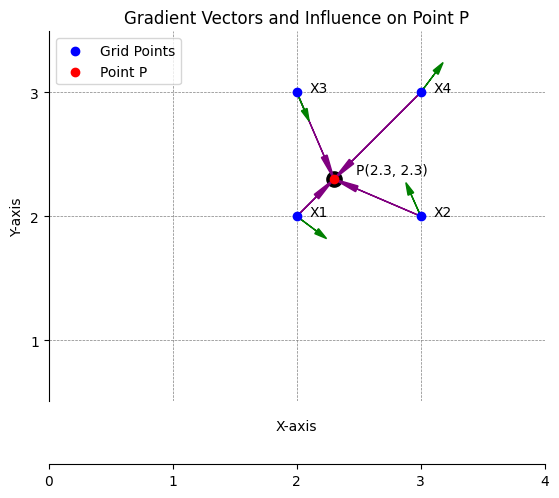

In [3]:
grid_points = np.array([[2, 2], [3, 2], [2, 3], [3, 3]])

point_P = np.array([2.3, 2.3])

gradient_vectors = np.array([[0.8, -0.6], [-0.4, 0.9], [0.3, -0.7], [0.6, 0.8]])

P_vectors = point_P - grid_points

fig, ax = plt.subplots()

ax.scatter(point_P[0], point_P[1], color="black", s=120)

ax.scatter(grid_points[:, 0], grid_points[:, 1], color="blue", label="Grid Points", zorder=30)

ax.scatter(point_P[0], point_P[1], color="red", label="Point P", zorder=30)

for i, g in enumerate(gradient_vectors):
    ax.arrow(grid_points[i, 0], grid_points[i, 1], g[0] * 0.2, g[1] * 0.2, head_width=0.05, head_length=0.1, color="green", zorder=29)

for i, v in enumerate(P_vectors):
    ax.arrow(grid_points[i, 0], grid_points[i, 1], v[0], v[1], head_width=0.05, head_length=0.2, color="purple", length_includes_head=True, zorder=28)

labels = ['X1', 'X2', 'X3', 'X4']
for i, point in enumerate(grid_points):
    ax.text(point[0] + 0.1, point[1], labels[i], fontsize=10)

ax.text(point_P[0] + 0.18, point_P[1] + 0.04, "P(2.3, 2.3)", fontsize=10, zorder=100)

ax.set_title("Gradient Vectors and Influence on Point P")
ax.legend()
ax.axis("equal")
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")

ax.set_xlim([0, 4])
ax.set_ylim([0, 4])
ax.set_xticks(range(5))
ax.set_yticks(range(5))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))

ax.xaxis.set_label_coords(0.5, -0.05)
ax.yaxis.set_label_coords(-0.05, 0.5)

ax.grid(True, zorder=0, color="grey", linestyle="--", linewidth=0.5)

plt.show()

---
## Generating and Visualizing Perlin Noise

Now that we have implemented the Perlin Noise function, we can generate a noise pattern and visualize it.

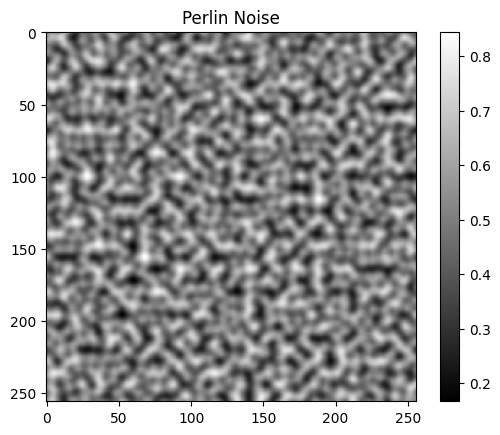

In [4]:
width, height, resolution = 256, 256, 8
noise = perlin_noise(width, height, resolution, seed=42)

plt.imshow(noise, cmap='gray')
plt.title('Perlin Noise')
plt.colorbar()
plt.show()


This code will generate and display a grayscale image of the Perlin Noise pattern. By adjusting the `width`, `height`, and `resolution` parameters, we can create noise patterns with varying sizes and details. The optional `seed` parameter allows us to generate reproducible noise patterns, which can be useful for debugging and consistency across multiple runs.

### Exploring Different Noise Patterns

We can experiment with different parameter values to explore the variety of noise patterns generated by the Perlin Noise function. For instance, we can try adjusting the resolution to create noise patterns with different levels of detail:

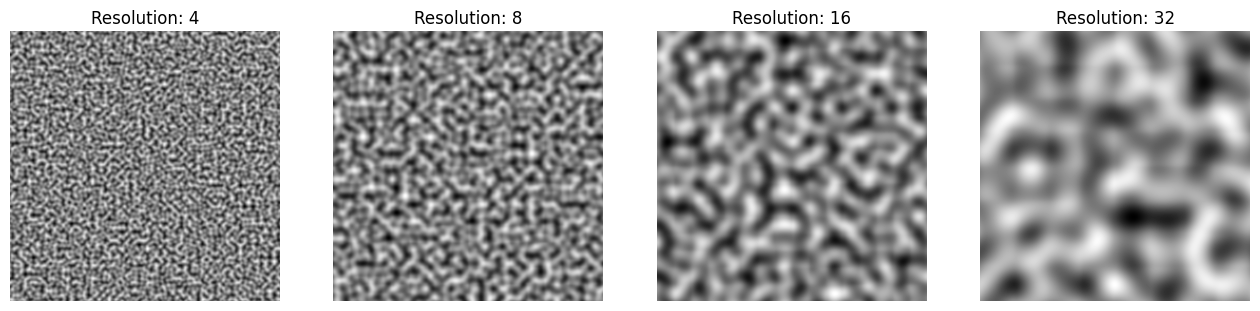

In [5]:
resolutions = [4, 8, 16, 32]
noise_patterns = [perlin_noise(width, height, res, seed=42) for res in resolutions]

fig, axes = plt.subplots(1, len(resolutions), figsize=(16, 4))
for i, (ax, noise) in enumerate(zip(axes, noise_patterns)):
    ax.imshow(noise, cmap='gray')
    ax.set_title(f'Resolution: {resolutions[i]}')
    ax.axis('off')

plt.show()


In this example, lower resolutions result in larger features and smoother patterns, while higher resolutions yield finer details and more intricate noise patterns.

By leveraging the Perlin Noise function and `matplotlib`, we can generate and visualize a wide range of noise patterns suitable for various applications, such as terrain generation, texture synthesis, and procedural animation. This flexibility and versatility make Perlin Noise an invaluable tool in computer graphics, game development, and other related fields.


### Generating Noise with Multiple Octaves

To create more complex and realistic noise patterns, we can combine multiple octaves of Perlin Noise at different frequencies and amplitudes. This process is known as fractal noise or fractal Perlin Noise. We will implement a function that generates fractal Perlin Noise using the `perlin_noise` function we defined earlier.

In [6]:
def fractal_perlin_noise(width, height, resolution, octaves, persistence, seed=None):
    if seed:
        np.random.seed(seed)
    
    noise = np.zeros((width, height))
    amplitude = 1
    frequency = resolution
    
    for _ in range(octaves):
        noise += amplitude * perlin_noise(width, height, frequency, seed)
        amplitude *= persistence
        frequency *= 2
    
    noise = (noise - noise.min()) / (noise.max() - noise.min())
    
    return noise

### Generating and Visualizing Fractal Perlin Noise

We can now generate and visualize fractal Perlin Noise patterns using our newly defined `fractal_perlin_noise` function.

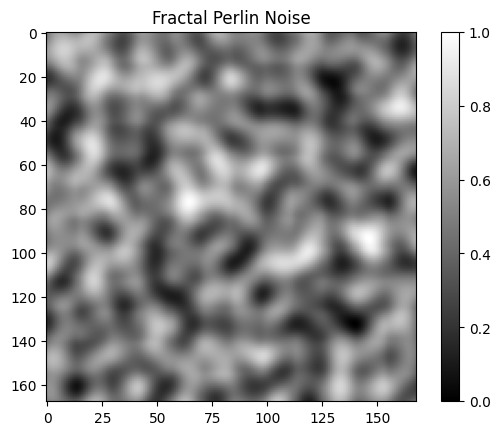

In [7]:
width, height = 168, 168
resolution = 14
octaves = 6
persistence = 0.5
noise = fractal_perlin_noise(width, height, resolution, octaves, persistence, seed=42)

plt.imshow(noise, cmap='gray')
plt.title('Fractal Perlin Noise')
plt.colorbar()
plt.show()


The resulting noise pattern exhibits a more complex and organic structure, making it suitable for applications like terrain generation or texture synthesis.

### Experimenting with Different Octave and Persistence Values

We could experiment with different octave and persistence values to explore the variety of noise patterns generated by the fractal Perlin Noise function.

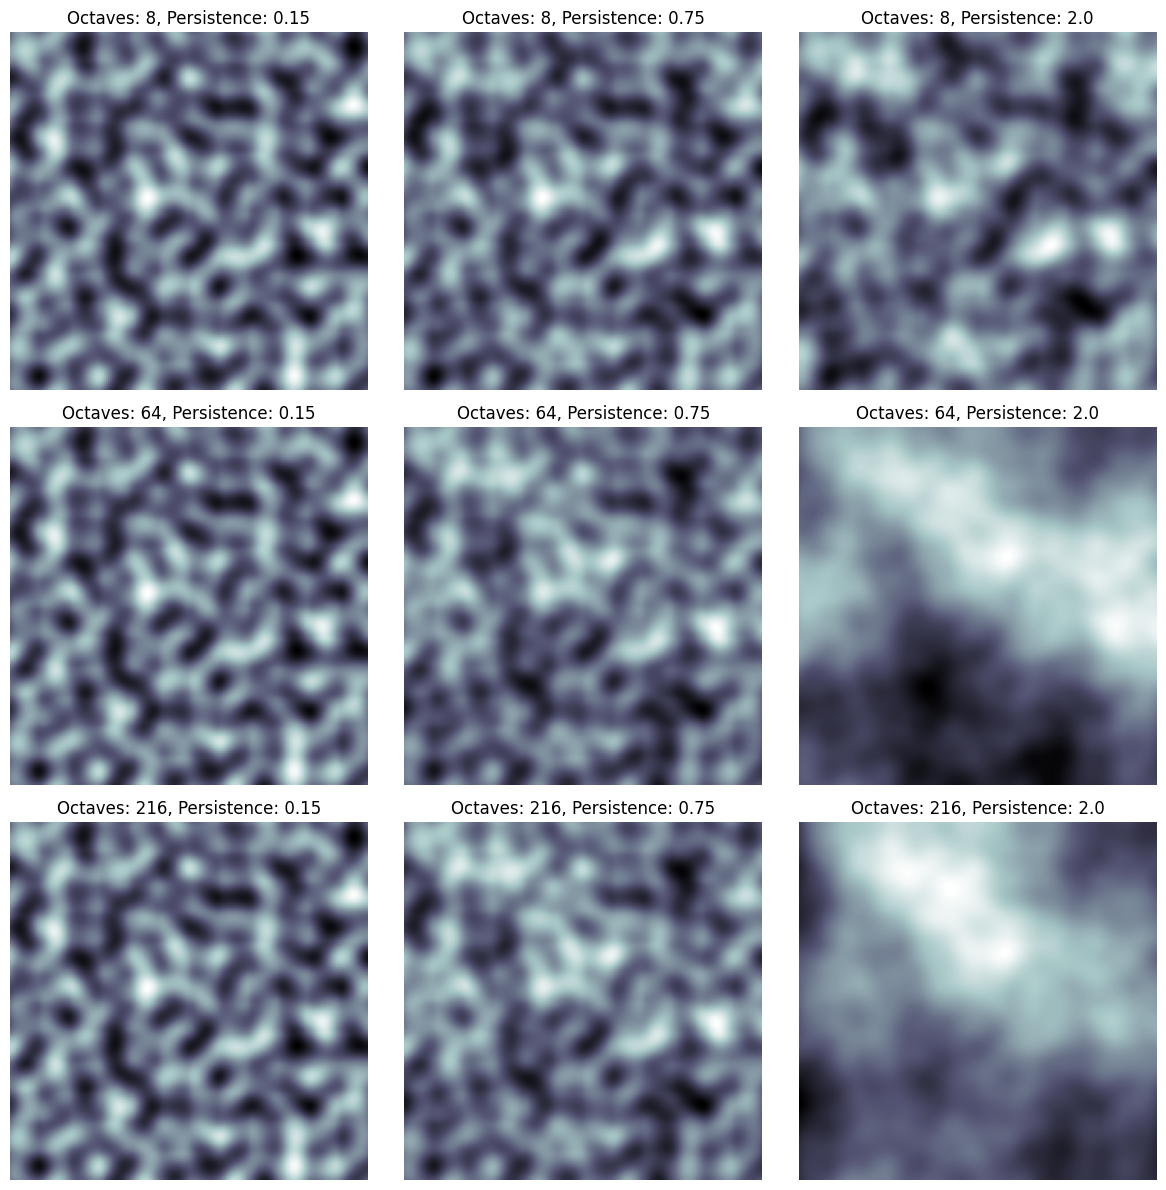

In [8]:
octave_values = [2, 4, 6]
persistence_values = [0.15, 0.75, 2.00]
noise_patterns = [
    fractal_perlin_noise(width, height, resolution, o, p, seed=42)
    for o in octave_values
    for p in persistence_values
]

fig, axes = plt.subplots(len(octave_values), len(persistence_values), figsize=(12, 12))
for i, row in enumerate(axes):
    for j, ax in enumerate(row):
        ax.imshow(noise_patterns[i * len(persistence_values) + j], cmap='bone')
        ax.set_title(f'Octaves: {octave_values[i] ** 3}, Persistence: {persistence_values[j]}')
        ax.axis('off')

plt.tight_layout()
plt.show()

The code above generates Fractal Perlin Noise patterns using different combinations of octave and persistence values. The results are visualized as a grid of images, where each image represents a unique combination of octave and persistence values.

The impact of varying the octave and persistence values on the noise patterns can be summarized as follows:

1. **Octaves**: Increasing the number of octaves adds more layers of noise to the pattern, making it more detailed and complex. A lower number of octaves results in a smoother, more uniform pattern, while a higher number of octaves leads to a richer, more intricate pattern. In the provided code, the patterns with 2, 4, and 6 octaves show increasing levels of detail and complexity.

2. **Persistence**: Persistence controls the amplitude of each successive octave in the noise pattern. A lower persistence value causes higher-frequency noise layers to have a smaller amplitude, making them less prominent in the pattern. A higher persistence value results in higher-frequency noise layers having a larger amplitude, making them more prominent and creating a rougher pattern. In the provided code, the patterns with persistence values of 0.15, 0.75, and 2.00 show increasing levels of roughness.

Changing the octave and persistence values in the Fractal Perlin Noise generation process can drastically affect the appearance of the resulting patterns. Increasing the number of octaves adds more detail and complexity, while adjusting the persistence value controls the prominence of higher-frequency noise layers, resulting in smoother or rougher patterns.

<a href="../PearlNoiseProject.ipynb">Back To Main</a>

<a href="#top">Top</a>